# Tasks Workbook

In [1]:
# importing necessary python modules
import pandas as pd
import os
import datetime

## Task One: Create Directory Structure

For Task 1 several commands need to be used to both create files and directories using CMDER. These include
- pwd (present working directory) - this command is used to locate the location of the current directory
- ls - this command is used to see the contents of the directory (both directories and files)

```ls``` 

```data/  README.md  weather.ipynb```


- cd (change directory command) - this command is used to change to a directory by specificying the name after the command as below

```cd compuer_infrastructure_assessment```

- mkdir (make diractory) - this command is used to create a directory when specifieid with the name of the new directory 

```mkdir data```
8
- touch - this command is used to create a new file in the current directory and specifying its name and file extension (*.py* for python). If using *Visual Studio Code* terminal, then the touch command can be replace by using *code*. 

```touch weather.ipynb```

```code weather.ipynb # VS Code```

If a folder was created within the wrong directory then the *rm* command can be used. This can be paired with *-rf* to suppress the confirmation messages that a file was deleted. *-rf* shoud only be added to the *rm* command if the user is sure of the correct file to delete as the file will be will forcibly deleted files without asking permission. More information on the command is found [here](https://www.maths.cam.ac.uk/computing/linux/unixinfo/rm#:~:text=The%20rm%20command%20is%20used,delete%20three%20or%20more%20files.).

These commands have come from a Linux [page](https://www.redhat.com/sysadmin/create-delete-files-directories-linux), but more of the options to suppress messages when deleting files came from a Stackoverflow [page](https://stackoverflow.com/questions/2642147/how-to-remove-files-and-directories-quickly-via-terminal-bash-shell)

## Task Two: Timestamps

For Task two, *VS Code* was used to create a file then append the current timestamp (no timezone) using the **date** command and append operator (>>). If the single > was used, then the previous content of the file will be overwritten. The format for the date command was found online [here](https://www.geeksforgeeks.org/date-command-linux-examples/).

The file was first created within *VS Code* using the *code* command.

```code now.txt``` 

Then the date was added with this command being used 10 times. In this case, the date format was not specified (but timezone is UTC)

```date >> now.txt``` 

Finally, the file *now.txt* as checked using the **more** command, but **nano** could of being used. The format of the first two instances of *date >> now.txt* is shown below but some of the contents of the file. 

```more now.txt```\
\
```Monday 21 October 2024 20:51:07```\
\
\
\
```Monday 21 October 2024 20:51:18```



## Task Three: Formatting Timestamps

For Task three, work was moved to *Github Codespaces* as somme of the Linux commands were not working well on a Windows machine.  Firstly a file was created and the date was added to in a specificed format (*YYYYmmdd_HHMMSS*) and compluted using format commands from **date** [here](https://www.geeksforgeeks.org/date-command-linux-examples/).

The file was first created 

```touch formatted.txt``` 

Then the date was appended to the file (*formatted.txt*) in the specific format and checked using **more**. Within the *date* command `%Y` returns year as a four digit year (2024), `%m` returns a two-digit month (10), `%d` returns a two-digit day (21), `%H` returns a two-digit hour on the 24 hour clock (20), `%M` returns a two-digit minitue (19), and `%S` returns a two-digit second (52). The date and time has being delimited by an underscore (`_`) to return a final date of `20241021_201952`. This date format is wrapped in double quotation mark to represent the date as text for the file name. More information is found [here](https://phoenixnap.com/kb/linux-date-command) on the *date* command. It is important to use the correct case for the format of the date as `%d` returns the day while `%D` returns the date in the `MM/DD/YY` format. 

```date +"%Y%m%d_%H%M%S" >> formatted.txt``` 

```more now.txt```\
\
```20241021_201952```

*VS Code* was used for the previous two tasks, but for this task and onwards, *Github codescapes* was used instread to get full use of commands. 


## Task Four: Create Timestamped Files

For task four, an empty .txt file is created using the below commands. The backticks (`) are used to include the date command with the predetermined format with a textfile extension used. When more is used on this file no content is shown as it is an empty textfile. 

```touch `date +"%Y%m%d_%H%M%S.txt`"```

```more 20241021_203321.txt``` 

## Task Five: Download Today's Weather Data

The directory was changed to data/weather and the JSON in the Met Eireann API was downloaded for todays weather for [Atherny](https://prodapi.metweb.ie/observations/athenry/today) and is saved in the directory called *weather.json*. This is accomplished using the command *wget* as below using the -O option (the --output option can be used an an alternative by checking the documention using *wget --help*) to name the file *weather.json* in the below [format](https://phoenixnap.com/kb/wget-command-with-examples). 

```wget -O [file_name] [URL]```

```wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today```

This has now being downloaded and renamed into the *weather/data* directory.

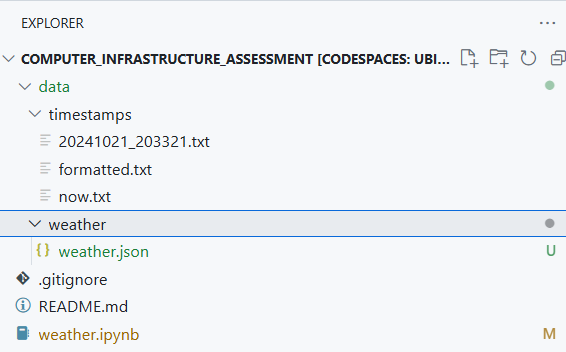



The *wget* command gets this file by interacting the the Met Éireann API over the HTTPS protocol. 

## Task Six: Timestamp the Data

This task repeats the process of Task Five, but changes the name of the downloaded file to add in the date information using the *date* function in Task four in the *YYYYmmdd_HHMMSS* format. By putting in the date format rather than specifying the date, it means that the task can be automated much more easily. 

The general layout of the command will be as below;

```wget -O `date +"%Y%m%d_%H%M%S.json"` [URL]```

The full command will be;

```wget -O `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today```

The new file *20241027_192904* is now present in the *data/weather* directory. While the command *wget* was used for Task Five & Six, *[curl](https://curl.se/)* (or cURL) could have being used instead.

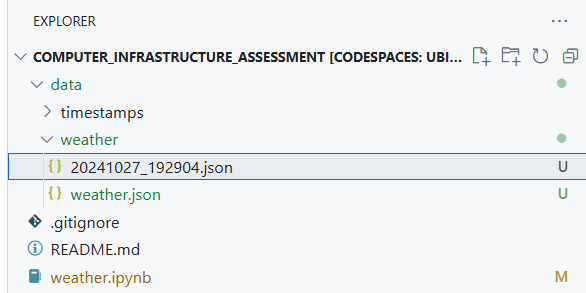

## Task 7: Write the Script

The weather bash script (*weather.sh*) file could be written using the VS Code GUI on *Github Codespaces*, but it would be easier to directly insert the commands into a script using a [context manager](https://realpython.com/python-with-statement/). This context manager handles the opening and closing of the file. In addition, using a context manager to write to a file means it is easier to automate rather than adding the commands manually. 

The first part of the *sh* file is the shebang. For it to be written as a bash file, the shebang needs to be *#! */bin/bash* (for a script to be run as a python file the scabang needs to be #! */usr/bin/python3*). 

This was then used to run the script through the command line where the *20241027_212010.json* was saved in the *data/weather* directory. The two below commands were completed after the script was created below to allow executable permissions for the user so that the script could run in the second command. Further info on *chmod* (change mode) are available [here](https://cets.seas.upenn.edu/answers/chmod.html).

```chmod u+x ./weather.sh ```

```./weather.sh ```

In [2]:
# the directory needs to be changed to make sure we are in the root of the directory 
os.chdir('/workspaces/computer_infrastructure_assessment/')

# wget command was updated - see below markdown

text = """#! /bin/bash
date
echo "Weather data for Athenry is downloading..." 
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
echo "...Weather data for Athenry is downloaded" 
""" 
# text needs to be wrapped in triple quotes to put commands on new lines
# https://betterstack.com/community/questions/python-how-to-define-multiline-string/

with open('weather.sh', mode="w") as file:
    file.write(text)

The above task worked, however when it came to the project to run a [Github Action](https://docs.github.com/en/actions/writing-workflows/quickstart) it failed. Checking the error message of the log file it of the Github Action had `no such file or directory`.  

When writing Task 7 the directory was labelled as `/workspaces/computer_infrastructure_assessment/data/weather/` prior to adding the `date` command within the Github codespace. 

However after reading up on this issue [here](https://github.com/orgs/community/discussions/15506) it was better to leave out the `/workspaces/computer_infrastructure_assessment` which was trialed in a new shell file `weather_updated.sh` as shown below. The `wget` command goes straight to the data directory from the root directory of the `computer_infrastructure_assessment` repository. 


**Previous `weather.sh` code**

    #! /bin/bash
    date
    echo "Weather data for Athenry is downloading..." 
    wget -O /workspaces/computer_infrastructure_assessment/data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
    echo "...Weather data for Athenry is downloaded

**Updated `weather.sh` code**

    #! /bin/bash
    date
    echo "Weather data for Athenry is downloading..."
    wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
    echo "...Weather data for Athenry is downloaded"

When the `./weather.sh` command was run in the terminal was run now it ran successfully. The `weather.sh` file was updated (`chmod` does not need to be run again on this file as the file has the necessary permissions) with the correct path variable and `weather_updated.sh` file was removed from the present repository.  

## Task 8: Notebook

As part of this task, the current Jupyter Notebook *weather.ipynb* was created which outlines the commands for each of the tasks. 

## Task 9: pandas

For this task, one of the weather files will be loaded and printed to the console. This dataset contains weather data from the Athenry weather station (-8.8 Longitude, 53.3 Latitude), refer to below figure. The features include
- Dry bulb temperature in whole degrees ($^\circ C$),  
- Weather description, 
- Windspeed (kph),
- Cardinal Wind Direction ($^\circ$),
- Relative Humidity (%),
- Rainfall (mm),
- msl Pressure (hPa),
- Day of the week; Date,
- Time of observation.

Data is recorded mostly every hour (local times) and several categorcial and continuous variables are measured. Continuous variables include *humidity* and *rainfall* while the categorical variables include *weatherDescription*. Further information of the National Observing Network is found [here](https://www.met.ie/climate/the-national-observing-network/#:~:text=Met%20%C3%89ireann's%20Weather%20Observation%20Network,forecast%20verification%20and%20meteorological%20research.) and image in below map was downloaded [here](https://www.met.ie/cms/assets/uploads/2020/10/synoptic.png)

![Map of Ireland showing Mét Eireann Automatic Weather Stations](img/map.png)

**Figure 1:** Map of Mét Eireann Automatic Weather Stations with Athenry located to the east of Galway city. 

In [3]:
# the directory needs to be changed to make sure we are in the weather directory
os.chdir('/workspaces/computer_infrastructure_assessment/data/weather')

weather_data = pd.read_json('20241027_192904.json')
print(weather_data.head())

weather_data.describe()

      name  temperature symbol weatherDescription      text  windSpeed  \
0  Athenry            2    02n               Fair    "Fair"          4   
1  Athenry            2    15n         Fog / Mist    "Mist"          4   
2  Athenry            2    02n               Fair    "Fair"          4   
3  Athenry            3    02n               Fair    "Fair"          6   
4  Athenry            4    04n             Cloudy  "Cloudy"          2   

  windGust cardinalWindDirection  windDirection  humidity  rainfall  pressure  \
0        -                     W            270        96       0.0      1020   
1        -                     S            180        97       0.0      1020   
2        -                    SW            225        97       0.0      1020   
3        -                     S            180        99       0.0      1020   
4        -                     S            180        97       0.0      1020   

  dayName       date reportTime  
0  Sunday 2024-10-27      00:00  


,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21
mean,8.285714,14.238095,214.285714,94.333333,0.419524,1018.095238,2024-10-27 00:00:00
min,2.000000,2.000000,180.000000,86.000000,0.000000,1015.000000,2024-10-27 00:00:00
25%,5.000000,6.000000,180.000000,92.000000,0.000000,1016.000000,2024-10-27 00:00:00
50%,8.000000,15.000000,225.000000,97.000000,0.010000,1019.000000,2024-10-27 00:00:00
75%,12.000000,20.000000,225.000000,97.000000,0.500000,1020.000000,2024-10-27 00:00:00
max,14.000000,26.000000,270.000000,99.000000,2.500000,1020.000000,2024-10-27 00:00:00
std,4.291187,8.005653,34.579102,3.851407,0.742432,2.095346,NaN


In [4]:
print(weather_data.shape)

(21, 15)


The above code was to read in only one file from the `/weather` directory, but since there are multiple files with the same JSON structure then all of these files could be concatanated to the one dataframe for additional analysis. 

There is a method for doing this with the linked [source](https://stackoverflow.com/questions/30405420/loop-through-files-in-a-directory-add-a-date-column-in-pandas) being used as a template with several modifications needing to be made. Bot `path` and `filelist` were converted to commands using the `os` module so that this code is more reproducible and `frame` was also deleted as there is a command to add the json data to the `df` variable. A new column (`File Date`) was added that contains the filename with the file extension (`.json`) removed and added as the first column using the `pd.insert` method so that provenance of which file the data came from could be checked. 

Finally there should be five different values within the `File Name` column and this was checked using the below command, which matched file names contained within the `weather` directory. 

```print(data['File Date'].unique())``` 

```['20241027_212010' '20241125_171120' '20241027_192904' 'weather' '20241125_172848']```

In [5]:
path = os.getcwd()
filelist = os.listdir(path) 
list = []
for file in filelist:
    df = pd.read_json(path+'/'+file)
    date_name = file.split(".json")[0]
    df.insert(0, 'File Date', date_name, True)
    list.append(df)
data = pd.concat(list)

In [6]:
print(data.shape)
print(data['File Date'].unique())


(433, 16)
['20241027_212010' '20241208_101652' '20241129_213109' '20241129_220026'
 '20241211_202956' '20241125_171120' '20241207_101750' '20241027_192904'
 '20241211_114915' '20241203_101944' '20241129_220326' 'weather'
 '20241210_203930' '20241210_204013' '20241209_101942' '20241211_201129'
 '20241206_101843' '20241204_101903' '20241129_184435' '20241129_215734'
 '20241125_172848' '20241201_101722' '20241202_101938' '20241130_101625'
 '20241129_214214' '20241205_101904']


In [7]:
print(data.head())

         File Date     name  temperature symbol weatherDescription      text  \
0  20241027_212010  Athenry            2    02n               Fair    "Fair"   
1  20241027_212010  Athenry            2    15n         Fog / Mist    "Mist"   
2  20241027_212010  Athenry            2    02n               Fair    "Fair"   
3  20241027_212010  Athenry            3    02n               Fair    "Fair"   
4  20241027_212010  Athenry            4    04n             Cloudy  "Cloudy"   

  windSpeed windGust cardinalWindDirection  windDirection  humidity  rainfall  \
0         4        -                     W            270        96       0.0   
1         4        -                     S            180        97       0.0   
2         4        -                    SW            225        97       0.0   
3         6        -                     S            180        99       0.0   
4         2        -                     S            180        97       0.0   

   pressure dayName       date r

In [8]:
rows = data.shape[0]
num_files = len(filelist)
now = datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S') # adding date 
print(f'There are {rows} instaces of data from {num_files} files downloaded from the Athreny Weather Station as of {now}')

There are 433 instaces of data from 26 files downloaded from the Athreny Weather Station as of 11-12-2024 20:42:17


The above won't update every time there is a new Github action for the `weather.sh` file. 